## Imports

In [1]:
from PIL import Image
import os
from skimage import io
import tifffile as tif

## Read and split in single tiff files

In [5]:
def split_tif_stack(tif_image_stack):
    return [(i, page) for i, page in enumerate(tif_image_stack)]

def merge_rgb(files):
    images = []
    for i in range(0, len(files), 3):
        images.append(Image.merge("RGB", [files[i][1], files[i+1][1], files[i+2][1]]))
    return  images

def open_save_tif_files(tif_file_names, import_path="", export_path="", channel="all"):
    for file in tif_file_names:
        tif_image_stack = io.imread(import_path + file)
        for tuple in split_tif_stack(tif_image_stack):
            if not os.path.exists('%s/%s' % (export_path, file[:len(file)-4])):
                os.mkdir('%s/%s' % (export_path, file[:len(file)-4]))
            if channel == "all":
                tif.imwrite('%s/%s/page%d.tif' % (export_path, file[:len(file)-4], tuple[0]), tuple[1])
            elif channel == "R":
                tif.imwrite('%s/%s/page%d_R.tif' % (export_path, file[:len(file)-4], tuple[0]), tuple[1][:,:,0])
            elif channel == "G":
                tif.imwrite('%s/%s/page%d_G.tif' % (export_path, file[:len(file)-4], tuple[0]), tuple[1][:,:,1])
            else:
                tif.imwrite('%s/%s/page%d_B.tif' % (export_path, file[:len(file)-4], tuple[0]), tuple[1][:,:,2])

In [4]:
files = ["AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2.tif",
         "AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.35.23_1BGTHP2.tif",
         "AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.52.09_1BGTHP2.tif",
         "AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.05.28_1BGTHP2.tif",
         "AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.15.47_1BGTHP2.tif"]
open_save_tif_files(files, import_path=r"data/raw_data/63X/", export_path=r"data/test")

[[[102  98 345]
  [102 102 387]
  [107 101 440]
  ...
  [103 103 343]
  [102  99 388]
  [107 101 463]]

 [[102 102 388]
  [105 103 465]
  [101  98 527]
  ...
  [105 106 347]
  [111 105 400]
  [103 102 491]]

 [[100 107 434]
  [103 101 460]
  [108 100 509]
  ...
  [105 100 337]
  [104  98 381]
  [103 103 469]]

 ...

 [[102 102 127]
  [101 100 123]
  [ 98  99 111]
  ...
  [104 100 416]
  [102 103 398]
  [103 104 397]]

 [[105 101 128]
  [103 102 123]
  [100 103 125]
  ...
  [106 104 371]
  [107  99 400]
  [101 102 374]]

 [[ 98  98 141]
  [ 96  98 131]
  [105 100 128]
  ...
  [102  95 386]
  [102 106 397]
  [104  98 395]]]
(1197, 1299, 3)


AssertionError: 

In [7]:
open_save_tif_files(files, import_path=r"data/raw_data/63X/", export_path=r"data/", channel="R")

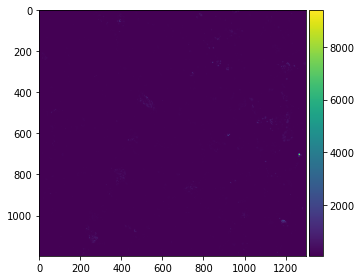

In [7]:
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 as cv
from skimage import io
# Generate an initial image with two overlapping circles
image = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0_R.tif")
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
new_image = image.copy()
alpha=3.0
beta=0
for y in range(image.shape[0]):
    new_image[y] = np.clip(alpha*image[y] + beta, 0, 255)
io.imshow(image)

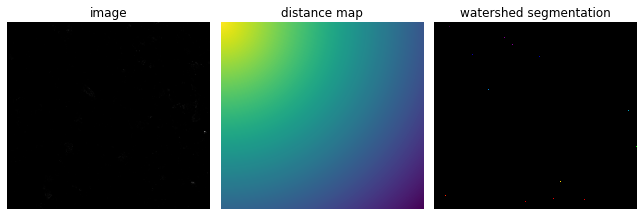

In [10]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('image')
plt.subplot(142)
plt.imshow(-distance, interpolation='nearest')
plt.axis('off')
plt.title('distance map')
plt.subplot(143)
plt.imshow(labels_ws, cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.title('watershed segmentation')

plt.tight_layout()
plt.show()